## Central Limit Theorem

If you have a population (regardless of distribution) with mean μ and take sufficiently large random samples (usually N > 30) from the population, then the distribution of the sample means will be approximately normally distributed

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env

In [2]:
# roll a virtual die
roll  = stats.randint(1, 7)

In [3]:
roll

Text(0.5, 1.0, 'Uniform Population distribution')

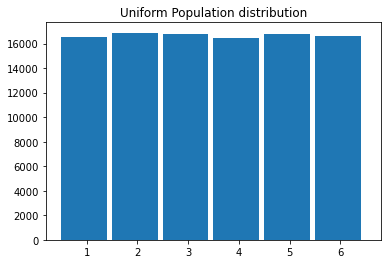

In [4]:
plt.hist(roll.rvs(100_000), bins= [1,2,3,4,5,6,7], align = 'left', width = 0.9)
plt.title('Uniform Population distribution')

In [5]:
roll.rvs(100_000).mean()

3.49723

### Distribution of sample means 
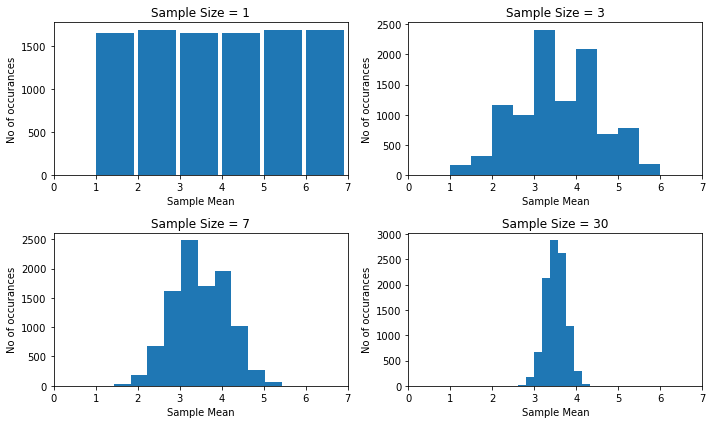

# Comparing Means


_______________________________________________________________________

|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*||  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: scipy.stats.ttest_1samp|Normally Distributed\*\*||   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): scipy.stats.ttest_ind|Independent, Normally Distributed\*\*, Equal Variances\*\*\*||   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: scipy.stats.f_oneway|Independent, Normally Distributed\*\*, Equal Variances**||   

\*If assumptions can't be met, the equivalent non-parametric test can be used.  
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption.   

## One Sample T-Test

**Goal: Compare observed mean to theoretical one.**

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{obs} = \mu_{th}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{obs} != \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly smaller)|$H_{a}$|$\mu_{obs} < \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly larger)|$H_{a}$|$\mu_{obs} > \mu_{th}$|      

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  

5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp`. 

6. Decide. **For a 2-tailed test, we take the p-value as is. For a 1-tailed test, we evaluate $p/2 < \alpha$ and $t > 0$ (to test if higher), and of a less-than test when $p/2 < \alpha$ and $t < 0$.**

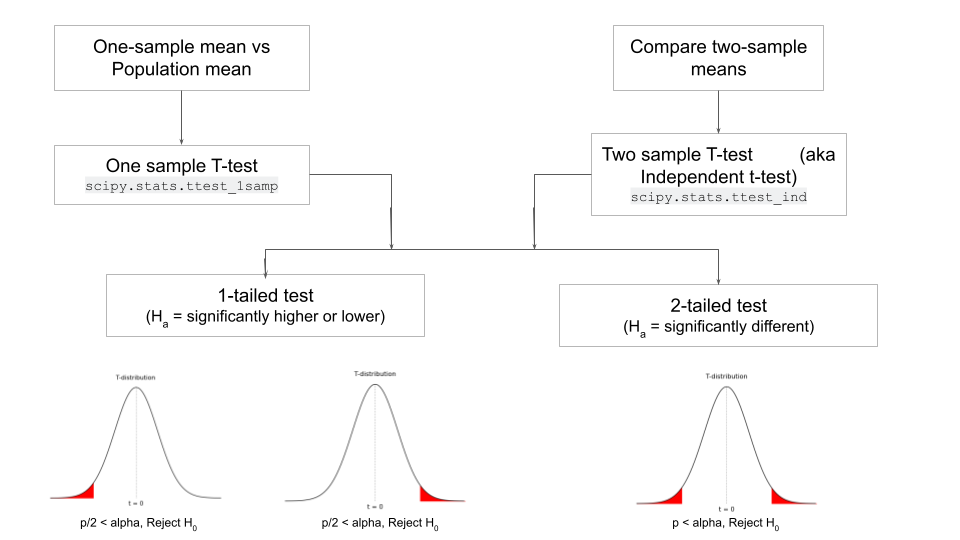

- t-statistic == 0 means no difference is means (i.e null hypothesis is true)
- Only when t-statistic is larger enough (positive or negative) we are confident that means are different enough to reject null

### Example 1

I believe customers who churn are charged more **(monthly average)** than the overall average monthly charges.  
Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers? 

We will use a 1-tailed ("significantly higher"), 1-sample (comparing 1 group to the average) t-test.  

In [6]:
# obtain the data

db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('''SELECT customer_id AS 'CustomerID',
        gender AS 'Gender',
        CASE WHEN senior_citizen = 0
        THEN 'Yes'
        ELSE 'No'
        END AS 'SeniorCitizen',
        partner AS 'Partner',
        dependents AS 'Dependents',
        tenure as 'Tenure',
        phone_service AS 'PhoneService',
        multiple_lines AS 'MultipleLines',
        CASE internet_service_type_id 
            WHEN 1 THEN 'DSL'
            WHEN 2 THEN 'Fiber Optic'
            ELSE 'None'
        END AS 'InternetService',
        online_security AS 'OnlineSecurity',
        online_backup AS 'OnlineBackup',
        device_protection AS 'DeviceProtection',
        tech_support AS 'TechSupport',
        streaming_tv AS 'StreamingTv',
        streaming_movies AS 'StreamingMovies',
        CASE contract_type_id
            WHEN 1 THEN 'Month-to-month'
            WHEN 2 THEN 'One Year'
            WHEN 3 THEN 'Two Year'
        END AS 'Contract',
        paperless_billing AS 'PaperlessBilling',
        CASE payment_type_id
            WHEN 1 THEN 'Electronic Check'
            WHEN 2 THEN 'Mailed Check'
            WHEN 3 THEN 'Bank Transfer'
            WHEN 4 THEN 'Credit Card'
        END AS 'PaymentMethod',
        monthly_charges AS 'MonthlyCharges',
        total_charges AS 'TotalCharges',
        churn AS 'Churn'
FROM customers;''', db_url)  

In [7]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTv,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,Yes,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One Year,Yes,Mailed Check,65.6,593.3,No
1,0003-MKNFE,Male,Yes,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed Check,59.9,542.4,No
2,0004-TLHLJ,Male,Yes,No,No,4,Yes,No,Fiber Optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic Check,73.9,280.85,Yes
3,0011-IGKFF,Male,No,Yes,No,13,Yes,No,Fiber Optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic Check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,No,Yes,No,3,Yes,No,Fiber Optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed Check,83.9,267.4,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTv       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**A. Plot Distribution**

In [9]:
df.MonthlyCharges

0       65.60
1       59.90
2       73.90
3       98.00
4       83.90
        ...  
7038    55.15
7039    85.10
7040    50.30
7041    67.85
7042    59.00
Name: MonthlyCharges, Length: 7043, dtype: float64

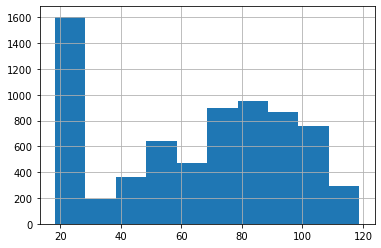

In [10]:
# plot distribution of monthly charges
# Distribution of *ALL* customers in the data set's monthly charges
# We are going to consider this our population
df.MonthlyCharges.hist()
plt.show()

In [11]:
μth = df.MonthlyCharges.mean() # μ is the mean of the population
μth

64.7616924605992

In [12]:
churned_custs = df[df.Churn == 'Yes'].MonthlyCharges

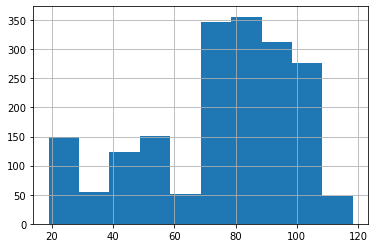

In [13]:
# plot distribution of montly charges for customer who churn
churned_custs.hist()
plt.show()

In [14]:
churned_custs.shape

(1869,)

**B. Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers  

**C. Set Alpha**

In [15]:
# we decide on 95% cofidence level (alpha = 0.05)

α = 0.05

**D. Verify Assumptions**

In [16]:
# How big is sample size for churned customers?
# If sample size is significantly > 30, we don't have to worry about normality (CLT!!)
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Our churn sample is large enough, as is overall count, to meet the assumptions of normal distributions. 

**E. Compute test statistic and probability (t-statistic & p-value)**

- scipy.stats.ttest_1samp
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0. 

In [17]:
churned_custs

2       73.90
3       98.00
4       83.90
18      62.70
19      25.10
        ...  
7020    96.80
7023    83.85
7036    70.15
7037    20.95
7039    85.10
Name: MonthlyCharges, Length: 1869, dtype: float64

In [18]:
# mean of the population (mean of monthly charges of churned customers)
μth

64.7616924605992

In [19]:
df.MonthlyCharges.mean()

64.7616924605992

In [20]:
# calculate t and p statistic
tstat, pval = stats.ttest_1samp(churned_custs, μth)

In [21]:
tstat

16.96540308050567

In [22]:
pval

3.740639299382399e-60

**F. Decide**

Is 1/2 * p < alpha AND t > 0? 

Is $t > 0$ and $p/2 < \alpha$

In [23]:
if (pval / 2 < α) and (tstat > 0):
    print("We reject the null hypothesis!")
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis!


## Example 2

**A. Distributions** See above

**B. Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers != Mean of monthly charges of all customers  

**C. Set Alpha** See above  

**D. Assumptions** See above  

**E. Compute test statistics**

**Two-tailed test**

In [24]:
t, p = stats.ttest_1samp(churned_custs, μth)

t, p , α

(16.96540308050567, 3.740639299382399e-60, 0.05)

**F. Is p-value less than alpha?**

In [25]:
if p < α:
    print("We reject the null hypothesis!")
else: 
    print("We fail to reject the null hypothesis")

We reject the null hypothesis!


## Independent T-Test (a.k.a. Two Sample T-Test)

Goal: Compare mean of group a to mean of group b. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{a} == \mu_{b}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{a} != \mu_{b}$|  
|Alternative Hypothesis (1-tail, a is significantly smaller than b)|$H_{a}$|$\mu_{a} < \mu_{b}$|  
|Alternative Hypothesis (1-tail, a is significantly larger than b)|$H_{a}$|$\mu_{a} > \mu_{b}$|      

3. Set Significance Level: $\alpha = .05$ (in other words Confidence level is 0.95)

4. Verify Assumptions:  
    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  
    - Independent samples  
    - Equal Variances (or set method argument to False when not)


5. Compute test statistic and probability (t-statistic & p-value) using `stats.ttest_ind`

6. Decide. 

### Example 1

I believe customers who churn are charged more (monthly average) than customers who don't churn. 
Is the mean of monthly charges of customers who churn significantly higher than the mean of those who don't churn? 

We will use a 1-tailed ("significantly higher"), 2-sample (comparing 2 groups) t-test.  

<AxesSubplot:>

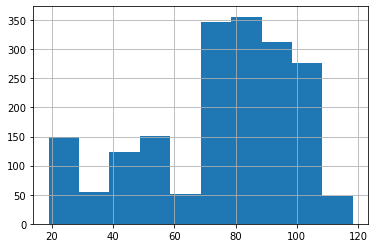

In [26]:
# histogram of churned customers
churn_sample = df[df.Churn == 'Yes'].MonthlyCharges

churn_sample.hist()

<AxesSubplot:>

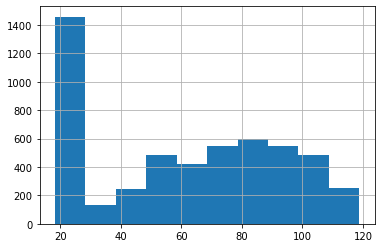

In [27]:
# histogram of non-churned customers

no_churn_sample = df[df.Churn == 'No'].MonthlyCharges

no_churn_sample.hist()

In [28]:
μa = df[df.Churn == 'Yes'].MonthlyCharges.mean()
μb = df[df.Churn == 'No'].MonthlyCharges.mean()

In [29]:
# group a, group b, and group c (population average)
μa, μb, μth

(74.44133226324232, 61.2651236954001, 64.7616924605992)

**Set Hypothesis**

**MUST INCLUE ALL POSSIBLE OUTCOMES**

$H_{0}$: Mean of monthly charges of churned customers <= Mean of monthly charges of NON-churned CUSTOMERS 
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of customers who haven't churned  

**Set Alpha**

In [30]:
alpha = .05

# **Verify Assumptions**

1. Independent Samples. YES! no observations in the churn sample exist in the no-churn sample. 

2. Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT).  YES! Plenty of observations

3. Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).

In [31]:
churn_sample = df[df.Churn == 'Yes'].MonthlyCharges
no_churn_sample = df[df.Churn == 'No'].MonthlyCharges

In [32]:
churn_sample.var(), no_churn_sample.var()

(608.4141833954315, 966.7527670734293)

In [33]:
# posit the idea of a variance test here:
# H0: churned customers and nonchurned customers have equal variance
# Ha: churned customers and nonchurned customers have inqequal variance

In [34]:
stat, pval = stats.levene(churn_sample, no_churn_sample)
if pval < 0.05:
    print('We can reject the H0 (Null Hyp) that the two samples have equal variance')

We can reject the H0 (Null Hyp) that the two samples have equal variance


If no, we will set the argument of equal_var to False. 


# **Compute Test Statistic**

In [35]:
# implications of one-tailed two-sampled t-test:
# p will be divided by two because we are only looking at one tail of the curve
# we will pay attention to the sign of our t-statistic
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var= False)
# t, p = t-test: (group A, group B) ==> comparison of mu_a > mu_b
t, p/2, alpha

(18.407526676414673, 4.2962246657737696e-73, 0.05)

**Decide**

In [36]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [37]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Example 2

Are charges of customers who churn *significantly different* than those who do not churn? 

$H_{0}$: Monthly charges of customers who churn equals that of those who don't churn.   

$H_{a}$: Monthly charges of customers who churn is not equal to that of those who don't churn. 

We can use 2 sample, 2-tailed t-test here

In [38]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var= False)

t, p, alpha

(18.407526676414673, 8.592449331547539e-73, 0.05)

In [39]:
if p< alpha:
    print('We reject the null hypothesis!')

We reject the null hypothesis!


**Decide**

Is the p-value less than alpha?

## Example 3

Are charges of customers who churn *significantly less* than those who do not churn? 

$H_{0}$: charges of customers who churn equals that of those who don't churn.   

$H_{a}$: charges of customers who churn is less than that of those who don't churn. 

In [40]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var= False)

t, p/2, alpha

(18.407526676414673, 4.2962246657737696e-73, 0.05)

**Decide**

is t < 0? AND is p/2 < alpha?


In [41]:
print("Is t < 0? ", t<0)

print("is p/2 < alpha? ", p/2<alpha)

Is t < 0?  False
is p/2 < alpha?  True


In [42]:
if (p/2 < alpha) & (t < 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


## Summary
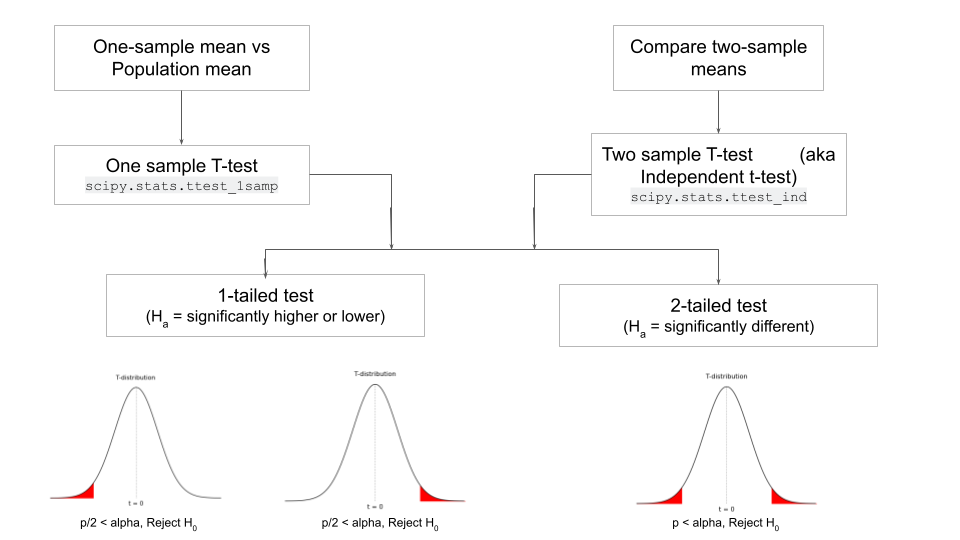

### MPG Example

In [43]:
df = sns.load_dataset('mpg')
df.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [44]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Drop nulls

In [46]:
# drop nulls
# Wherever horsepower is null,　it takes the rows off
df = df.dropna()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Do the vehicle built in USA have higher HP than vehicle from Japan?

In [48]:
# Two sample T-test
usa_hp = df[df.origin == 'usa'].horsepower
japan_hp = df[df.origin == 'japan'].horsepower

**Plot Distribution**

<AxesSubplot:>

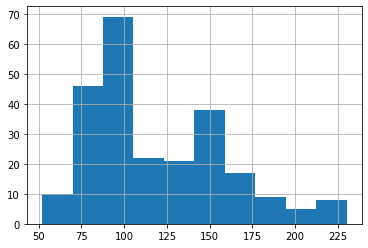

In [49]:
usa_hp.hist()

<AxesSubplot:>

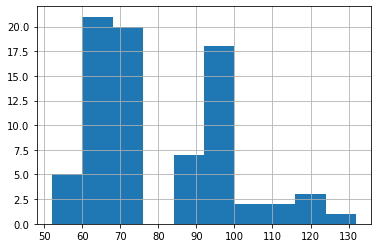

In [50]:
japan_hp.hist()

**Hypothesis**

$H_{0}$: hp is the same for usa and japan origin vehicles

$H_{a}$: hp is not the for usa and japan origin vehicles

**Significance Level**

$\alpha$ is already set to .05 (95% cofidence level)

**Verify Assumptions**

- Normal: yes!
- Independent: yes!
- Variance: No

In [51]:
usa_hp.var()

1591.8336567413864

In [52]:
japan_hp.var()

317.5238558909445

In [53]:
usa_hp.count(), japan_hp.count()

(245, 79)

In [54]:
# do two sample have similar variances?

usa_hp.var(), japan_hp.var()

(1591.8336567413864, 317.5238558909445)

Looking at the variances, they are very different, so I will move forward with a 2-sample, independent t-test comparing usa made cars vs. japan made cars and set equal_var = False). 

In [55]:
# use Scipy's independent ttest to find t and p

t, p = stats.ttest_ind(usa_hp, japan_hp, equal_var= False)

t, p, alpha

(12.092022948407953, 1.5146320352820352e-27, 0.05)

**Decide**

is p-value less than alpha? 

In [56]:
p < alpha

True

Reject null hypothesis. The hp of usa cars vs. japan cars is significantly different. 

### Mini Exercise:

Are the USA origin vehicles heavier than vehicles with japan origin?

In [57]:
# One-tailed since the question asks for 1 value (is it HEAVIER not is it different)
usa_weight = df[df.origin == 'usa'].weight
japan_weight = df[df.origin == 'japan'].weight

#### Decide?

One sample t-test or 2-sample t-test?  
One tailed or two tailed?

Two-Sample T-test, 1-tailed

#### Plot distributions

<AxesSubplot:>

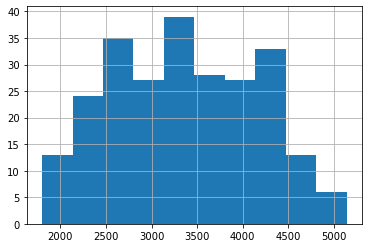

In [58]:
usa_weight.hist()

<AxesSubplot:>

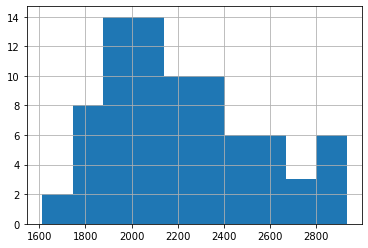

In [59]:
japan_weight.hist()

**Hypothesis**

$H_{0}$: average weight for usa origin vehicle == average weight for japan origin vehicle

$H_{a}$: average weight for usa origin vehicle > average weight for japan origin vehicle



**Significance Level**

$\alpha$ = 0.05

**Verify Assumptions**

- Normal: Yes!
- Independent: Yes! 
- Variance: 

In [60]:
usa_weight.var(), japan_weight.var()

(632576.3574774171, 102718.48588120737)

In [61]:
# use stats.ttest to calculate t and p
t, p = stats.ttest_ind(usa_weight, japan_weight, equal_var= False)

t, p/2, alpha

(18.477210677200812, 4.197101303537906e-52, 0.05)

#### Decide

In [62]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [63]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [64]:
df.model_year.value_counts()

73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: model_year, dtype: int64

In [65]:
weight_73 = df[df.model_year == 73].weight

In [66]:
weight_78 = df[df.model_year == 78].weight

In [67]:
weight_73.var()

950252.8455128204

In [68]:
weight_78.var()

391905.93253968254

In [69]:
from pydataset import data

In [70]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [71]:
t, p = stats.ttest_ind(weight_73, weight_78, equal_var= False)

t, p/2, alpha

(2.993787990104244, 0.0019265781509992931, 0.05)

In [72]:
weight_73.mean()

3419.025

In [73]:
weight_78.mean()

2861.8055555555557

# Exercises

In [74]:
import scipy
import matplotlib.plyplot as plt
import numpy as np

 # 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

Notes : 
 - "different" = two-tailed test
 - Office 1
     - over 30 samples (40)
     - mean = 90 days
     - std = 15 days
 - Office 2 
     - sample 50
     - mean = 100 days
     - std = 20
 - p = .05

What are we comparing?
- avg time 
- one sample or two sample? **Two Sample**
- one tailed or two tailed?  **Two Tailed for asking about a difference**

Hypothesis:
- H0:  Avg time to sell at office 1 <= avg time to sell at office 2
- Ha: Avg time to sell at office 1 != avg time to sell at office 2

scipy.stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')

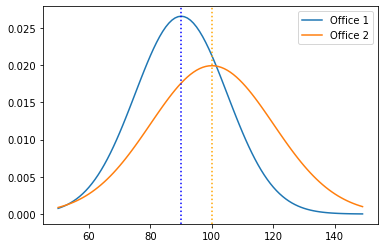

In [130]:
# visualize dist

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)

plt.plot(x, y1, label = 'Office 1')
plt.plot(x, y2, label = 'Office 2')
plt.axvline(90, ls=":", color = 'blue')
plt.axvline(100, ls=":", color = 'orange')

plt.legend()

In [135]:
t, p = scipy.stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50,
                                 equal_var=False)
t, p, alpha

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [138]:
# we don't care about T here 
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


# 2. Load the mpg dataset and use it to answer the following questions:

In [149]:
mpg = data('mpg')

In [229]:
# harmonic mean instead of algebraic mean 
mpg['efficiency'] = stats.hmean(mpg[['cty','hwy']], axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [230]:
fuel_08 = mpg[mpg.year == 2008].efficiency
fuel_99 = mpg[mpg.year==1999].efficiency

<AxesSubplot:>

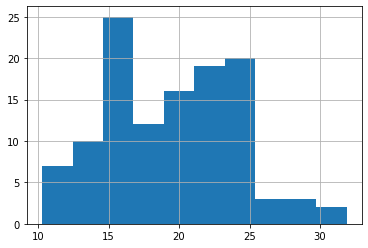

In [155]:
fuel_08.hist()

<AxesSubplot:>

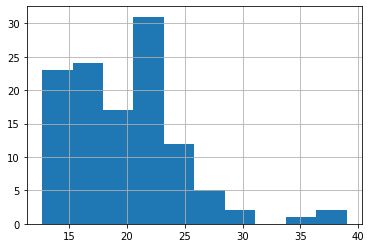

In [156]:
fuel_99.hist()

# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

**Hypothesis**

$H_{0}$: There is no difference in fuel-efficiency in cars from 2008 and 1999

$H_{a}$: There is a difference in fuel-efficiency in cars from 2008 and 1999



**Significance Level**

$\alpha$ = 0.05

**Verify Assumptions**

- What are we comparing. 1 sample or 2 sample? 1 tailed or 2 tailed_
    - Two tailed

In [163]:
# calculate variance
fuel_99.var(), fuel_08.var()

(25.850396545865912, 22.550836772260343)

In [164]:
# levene p_value test
stats.levene(fuel_99, fuel_08)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [172]:
# calculate t & p value
t, p = stats.ttest_ind(fuel_08, fuel_99)

In [175]:
# p value is always the most important. There is no difference between the two
t, p

(-0.3011962975077886, 0.7635345888327115)

In [179]:
#no they are not different
if (p < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


(array([[12., 23., 18., 30., 23.,  4.,  4.,  0.,  1.,  2.],
        [ 8., 25., 21., 21., 25., 12.,  4.,  1.,  0.,  0.]]),
 array([10.28571429, 13.15587703, 16.02603978, 18.89620253, 21.76636528,
        24.63652803, 27.50669078, 30.37685353, 33.24701627, 36.11717902,
        38.98734177]),
 <a list of 2 BarContainer objects>)

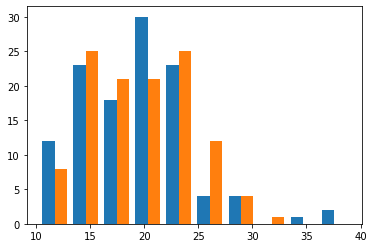

In [185]:
plt.hist([fuel_99, fuel_08], label=['1999 cars', '2008 cars'])

# Are compact cars more fuel-efficient than the average car?


- H0 : mpg for compact cars <= mpg for the average car
- Ha: mpg for compact cars > mpg for the average car

- 1 tailed t-test as it is only asking one thing. *Is it better*?



In [186]:
avg_car = mpg.efficiency.sum() / len(mpg)

In [187]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [199]:
compact_car = mpg[mpg['class'] == 'compact'].efficiency

<AxesSubplot:>

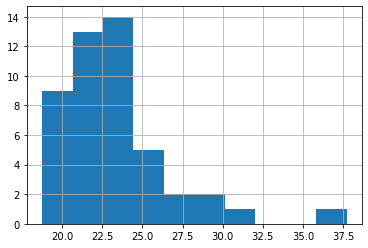

In [200]:
compact_car.hist()

In [209]:
# population mean. I.E the total efficiency mean
μth = mpg.efficiency.mean()
μth

19.585525317633177

In [210]:
compact_car.mean()

23.500416808701296

In [211]:
# array of values vs the population mean μth
t, p = stats.ttest_1samp(compact_car, μth)
t, p, alpha

(7.512360093161354, 1.5617666348807727e-09, 0.05)

In [212]:
# no they are not different :
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [213]:
p/2 < alpha

True

# Do manual cars get better gas mileage than automatic cars?

In [192]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [193]:
manual = mpg[mpg.trans.str.contains('manual')].efficiency
auto = mpg[mpg.trans.str.contains('auto')].efficiency

<AxesSubplot:>

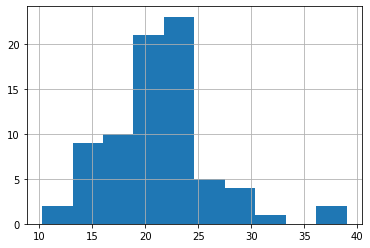

In [215]:
manual.hist()

<AxesSubplot:>

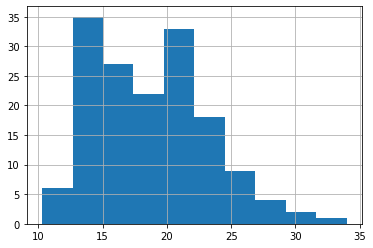

In [216]:
auto.hist()

In [217]:
# testing variance
manual.var(), auto.var()

(25.665633639828275, 20.428279095002054)

In [220]:
# testing in the levene test
# levene has its own null and alt hypothesis. It says they are NOT
# different from each other. Since it is closer to 100% (90% chance)
# that means that they are equal variance

stats.levene(manual, auto)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [231]:
# one tailed t-test divide p by 2 p/2
t, p = stats.ttest_ind(manual, auto, equal_var= True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [232]:
# this tells me that the mean is getting a better transmission than auto
# in this dataset
manual.mean(), auto.mean()

(21.629228592155194, 18.583199507835747)

In [233]:
if (p/2 < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis
